In [103]:
import statsmodels.tsa.api as tsa
import pandas as pd
import numpy as np
import datetime
from random import randrange
from matplotlib import pyplot
import statsmodels.tsa.api as tsa
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import het_arch
from scipy.stats import shapiro


In [104]:
data = pd.read_excel(r"C:\Users\Ruller\Downloads\problems\problem_1.xlsx", parse_dates=['date'], index_col='date') # read the excel file in data frame object
data = data.dropna() # remove missing data 
data.head()
factors = pd.DataFrame(data=data)
#,index_col='date', parse_dates=True // put this into data read excel
print(factors)


             stock_1  factor_1  factor_2  factor_3
date                                              
2017-06-30 -0.653845  0.118685  0.195143 -0.052389
2017-07-31 -8.208948 -0.007788 -0.071034  0.094496
2017-08-31  0.090122  0.132189  0.085711 -0.066484
2017-09-29 -0.467503  0.132189  0.085711 -0.066484
2017-10-31 -0.526875  0.015240  0.051610  0.107700
2017-11-30  0.794911  0.017855  0.038808  0.010421
2017-12-29 -0.753880  0.017855  0.038808  0.010421
2018-01-31  0.400484  0.123442  0.090615  0.066421
2018-02-28 -6.605226  0.057903 -0.060465 -0.198582
2018-03-30  0.000000  0.057903 -0.060465 -0.198582
2018-04-30 -1.252616  0.019211  0.050085 -0.004424
2018-05-31 -1.448595 -0.118646  0.198999  0.053926
2018-06-29 -3.441012 -0.118646  0.198999  0.053926
2018-07-31  1.644361 -0.093252 -0.061627 -0.090709
2018-08-31 -1.242018 -0.137885 -0.128545 -0.003366
2018-09-28  0.282049 -0.137885 -0.128545 -0.003366
2018-10-31  3.647995  0.299212  0.187921 -0.025202
2018-11-30 -2.877015  0.279493 

In [47]:
len(factors['stock_1'])

41

<AxesSubplot:xlabel='date'>

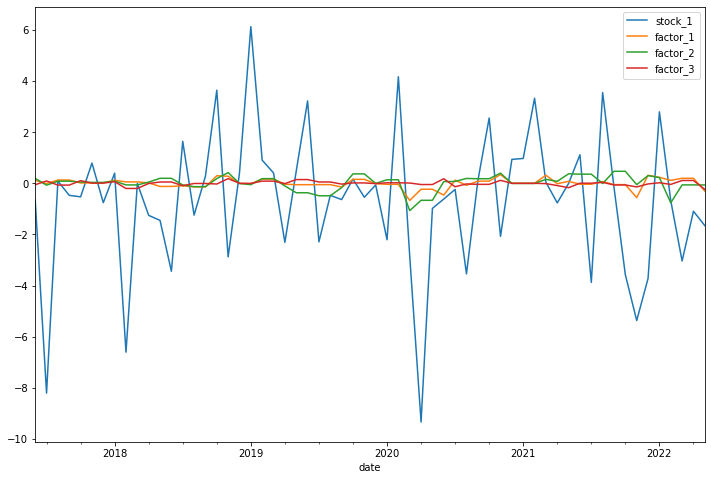

In [86]:
factors.plot(figsize=[12,8])

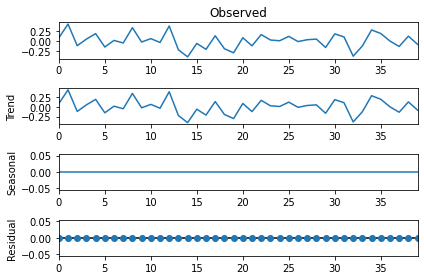

In [12]:
result = tsa.seasonal_decompose(stock_diff, model='additive', period=1)
#sd_detrend = result.observed - result.trend
result.plot()
pyplot.show()

Text(0.5, 1.0, 'Stock1 time series ')

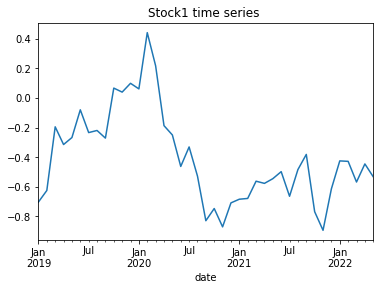

In [22]:
factors['stock_1'].plot()
pyplot.title(label="Stock1 time series ")


In [25]:
factors['stock_1'][:20].mean(),factors['stock_1'][21:].mean()

(-0.1871619865325, -0.6046343660149999)

In [27]:
factors['stock_1'][:20].var(),factors['stock_1'][21:].var()

(0.0811836989140828, 0.02140088504521947)

In [297]:
#https://www.kaggle.com/code/nholloway/volatility-clustering-and-garch/notebook
arch_test = het_arch(factors['stock_1'], maxlag=20)
shapiro_test = shapiro(factors['stock_1'])

print(f'Lagrange mulitplier p-value: {arch_test[1]}')
print(f'F test p-value: {arch_test[1]}')
print(f'Shapiro-Wilks p-value: {shapiro_test[1]}')

Lagrange mulitplier p-value: 0.3971325993508109
F test p-value: 0.3971325993508109
Shapiro-Wilks p-value: 0.12460216134786606


C:\Users\Ruller\AppData\Local\Temp\ipykernel_10628\1169008465.py:2: FutureWarning: the 'maxlag'' keyword is deprecated, use 'nlags' instead.
  arch_test = het_arch(factors['stock_1'], maxlag=20)


<AxesSubplot:ylabel='Count'>

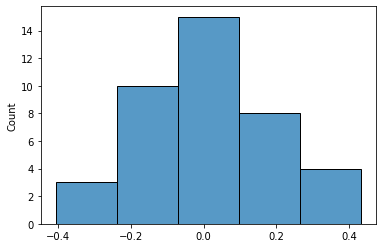

In [211]:
sns.histplot(data=stock_diff,bins=5)


In [49]:

from statsmodels.stats.diagnostic import acorr_ljungbox
AR_ORDER=acorr_ljungbox(stock_diff, 
               lags=8, 
               return_df=True)['lb_pvalue']

In [50]:
#https://robjhyndman.com/hyndsight/ljung-box-test/ HOW MANY LAGS FOR THIS AND ACF AND PACF
# AR ORDER MUST BE LESS THAN 0.05 up to lag n 

AR_ORDER

1    0.592605
2    0.518108
3    0.697754
4    0.779158
5    0.746929
6    0.479189
7    0.590898
8    0.658650
Name: lb_pvalue, dtype: float64

In [314]:
#387 page in tarek book this sum should be zero.The result shows 0, which is an aggregate of the results for the first 7 lags, 
#indicating no autocorrelation

#You will need to validate the model's return to determine if the ARIMA model 
#you built captured the signals in the time series. The assumption is that if the model 
#captured all the information, the residuals from the model's prediction are random 
#(noise) and do not follow a pattern. For example, you expect no autocorrelation 
#in the residuals. Start by using the acorr_ljungbox test on the residuals. 
#You should expect no autocorrelation that is AR_ORDER TO BE 0. 

# if its above is not 0 then we will continue differencing 

AR_ORDER.sum() 

0.039351256528245

           stock_1  factor_1  factor_2  factor_3
stock_1   1.000000  0.054453 -0.077698  0.031661
factor_1  0.054453  1.000000 -0.140806  0.024141
factor_2 -0.077698 -0.140806  1.000000 -0.194429
factor_3  0.031661  0.024141 -0.194429  1.000000


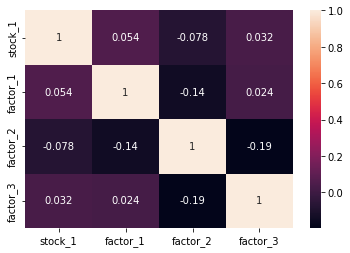

In [6]:
import seaborn as sns
# Calculate annual returns here
annual_returns = factors.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True);

In [105]:
factors['stock_1'] =factors.stock_1.rolling(window=20).mean()  
factors['factor_1'] =factors.factor_1.rolling(window=20).mean()
factors['factor_2'] =factors.factor_2.rolling(window=20).mean()
factors['factor_3'] =factors.factor_3.rolling(window=20).mean()
factors=factors.dropna()

In [131]:
rolling_window1 =factors.stock_1.rolling(window=20).mean()  
rolling_window2 =factors.factor_1.rolling(window=20).mean()
rolling_window3 =factors.factor_2.rolling(window=20).mean()
rolling_window4 =factors.factor_3.rolling(window=20).mean()
rolling_window1=rolling_window1.dropna()
rolling_window2=rolling_window2.dropna()
rolling_window3=rolling_window3.dropna()
rolling_window4=rolling_window4.dropna()

C:\Users\Ruller\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


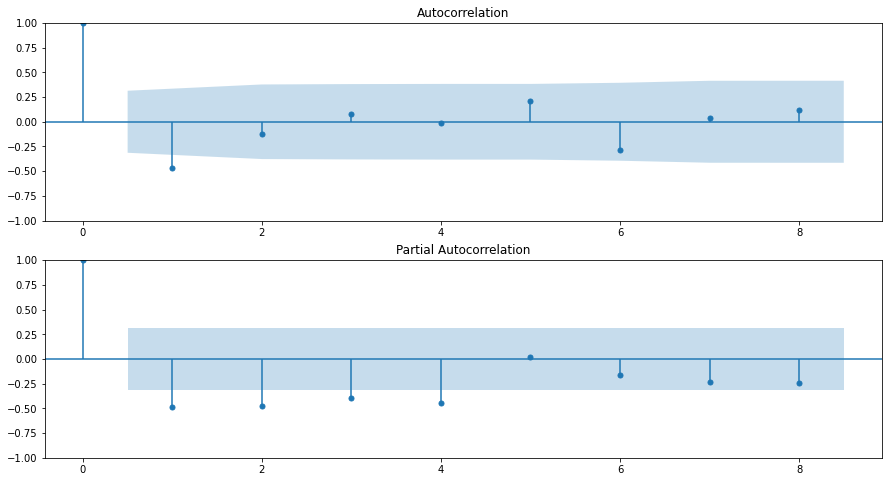

In [40]:
fig,ax = pyplot.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(stock_diff2, lags=8, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(stock_diff2, lags=8, ax=ax[1])
pyplot.show()

C:\Users\Ruller\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


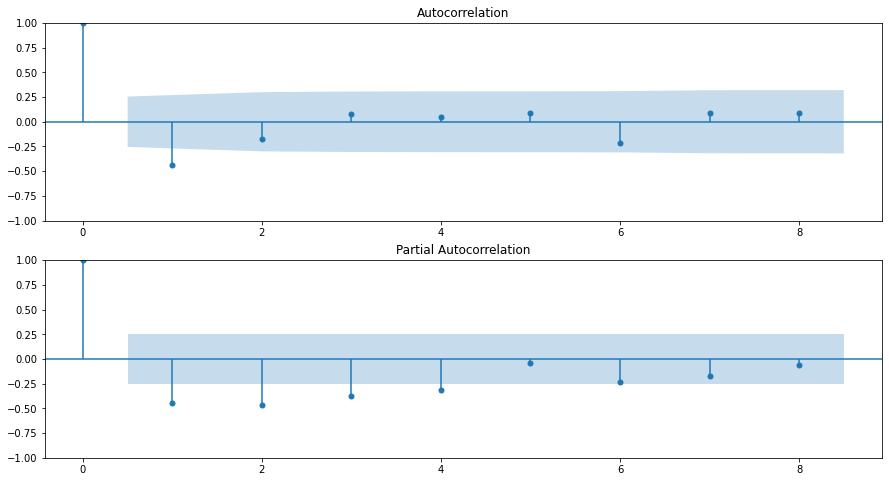

In [287]:
fig,ax = pyplot.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(stock_diff2, lags=8, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(stock_diff2, lags=8, ax=ax[1])
pyplot.show()

In [157]:
#CROSS CORELATION

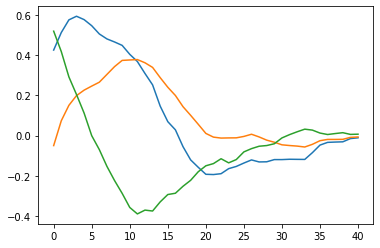

In [14]:
#https://www.statology.org/cross-correlation-in-python/
# MAKE SURE SERIES ARE STATIONARY ELSE CANNOT USE CCF
#https://link.springer.com/article/10.3758/s13428-015-0611-2#:~:text=The%20stationarity%20of%20both%20series,risk%20of%20spurious%20cross%2Dcorrelations.
# grander causality also needs stationarity!!!!
x=pyplot.plot(sm.tsa.stattools.ccf(rolling_window1, rolling_window2, adjusted=False))
y=pyplot.plot(sm.tsa.stattools.ccf(rolling_window1, rolling_window3, adjusted=False))
z=pyplot.plot(sm.tsa.stattools.ccf(rolling_window1, rolling_window4, adjusted=False))

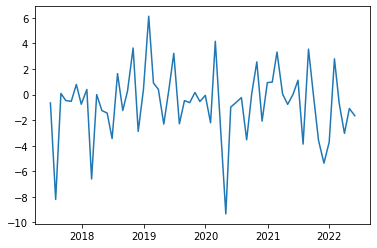

In [88]:
pyplot.plot(factors['stock_1'])

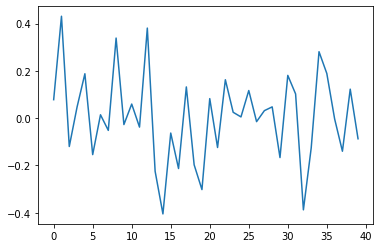

In [48]:
# DIFFERENCING TAKING THE DERIVATIVE 
X = factors['stock_1'].values
def difference(X):
    diff = list()
    days_in_year = 1
    for i in range(days_in_year, len(X)):
        value = X[i] - X[i - days_in_year]
        diff.append(value)
    return diff
stock_diff=difference(X)

pyplot.plot(stock_diff)
pyplot.show()

Text(0.5, 1.0, 'Stock1 first time differencing ')

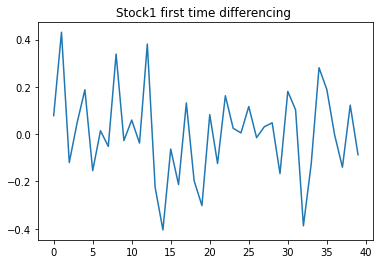

In [31]:
pyplot.plot(stock_diff)
pyplot.title(label="Stock1 first time differencing ")

In [52]:
from statsmodels.stats.diagnostic import acorr_ljungbox
AR_ORDER=acorr_ljungbox(stock_diff2, 
               lags=8, 
               return_df=True)['lb_pvalue']

In [53]:
AR_ORDER

1    0.002195
2    0.006661
3    0.016173
4    0.035607
5    0.029241
6    0.011384
7    0.020492
8    0.027328
Name: lb_pvalue, dtype: float64

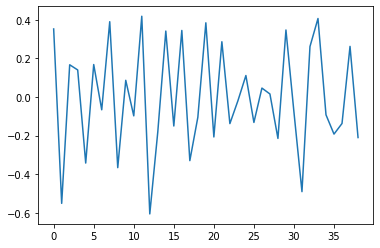

In [51]:
# DIFFERENCING 2nd time TAKING THE DERIVATIVE 
Y = stock_diff
def difference(Y):
    diff2 = list()
    days_in_year = 1
    for i in range(days_in_year, len(Y)):
        value = Y[i] - Y[i - days_in_year]
        diff2.append(value)
    return diff2
stock_diff2=difference(Y)

pyplot.plot(stock_diff2)
pyplot.show()

Text(0.5, 1.0, 'Stock1 second differencing')

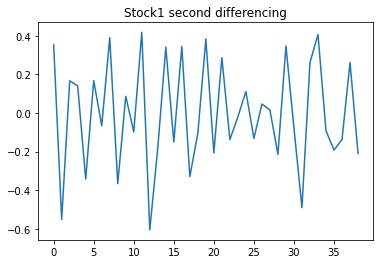

In [42]:
pyplot.plot(stock_diff2)
pyplot.title(label="Stock1 second differencing")


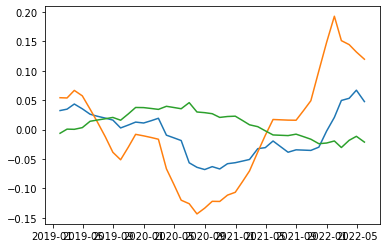

In [35]:
pyplot.plot(factors['factor_1'])
pyplot.plot(factors['factor_2'])
pyplot.plot(factors['factor_3'])

In [414]:
##https://stackoverflow.com/questions/56167373/how-to-read-test-results-if-i-am-using-johansen-test-to-determine-correlation-be?fbclid=IwAR1PEUZBrEYq7RiP5suRvncx2Ucn3fHCURscZ7XIpnqBt30Zp5eIPttz5bw

# CAN BE USED ONLY ON PRICES NOT RETURNS!!!
#import statsmodels.tsa.stattools as ts 
#result=ts.coint(factors['stock_1'], factors['factor_2'])
#result
#https://hudsonthames.org/an-introduction-to-cointegration/

In [ ]:
# arima model-https://www.kaggle.com/code/poiupoiu/how-to-use-sarimax/notebook

C:\Users\Ruller\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  self._init_dates(dates, freq)
C:\Users\Ruller\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  self._init_dates(dates, freq)
C:\Users\Ruller\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                stock_1   No. Observations:                   41
Model:                 ARIMA(3, 2, 0)   Log Likelihood                   5.842
Date:                Mon, 22 May 2023   AIC                             -3.684
Time:                        20:53:13   BIC                              2.970
Sample:                    01-31-2019   HQIC                            -1.297
                         - 05-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8256      0.170     -4.846      0.000      -1.160      -0.492
ar.L2         -0.6668      0.203     -3.286      0.001      -1.064      -0.269
ar.L3         -0.3348      0.170     -1.967      0.0

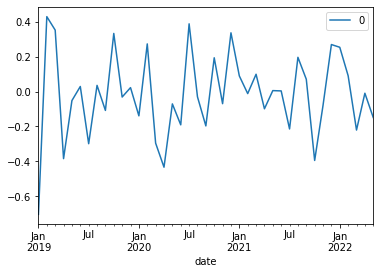

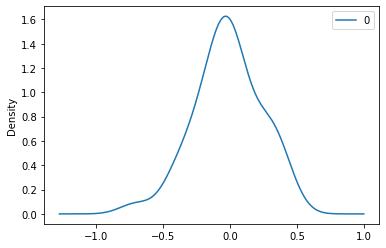

               0
count  41.000000
mean   -0.017051
std     0.245651
min    -0.703932
25%    -0.148598
50%    -0.011336
75%     0.099559
max     0.430049


In [111]:
from pandas import DataFrame

from statsmodels.tsa.arima.model import ARIMA
series=factors['stock_1']
model = ARIMA(series, order=(3,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# https://www.kaggle.com/code/poiupoiu/how-to-use-sarimax/notebook
# BEGIN MODEL

In [117]:

import statsmodels.api as sm

arima = sm.tsa.statespace.SARIMAX(factors['stock_1'],order=(3,2,0),seasonal_order=(0,0,0,0),simple_differencing=False,trend = 'c').fit()

arima.summary()
#We can use SARIMAX model as ARIMAX when seasonal_order is (0,0,0,0) .


C:\Users\Ruller\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  self._init_dates(dates, freq)
C:\Users\Ruller\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency BM will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                stock_1   No. Observations:                   41
Model:               SARIMAX(3, 2, 0)   Log Likelihood                   5.908
Date:                Mon, 22 May 2023   AIC                             -1.815
Time:                        21:12:07   BIC                              6.503
Sample:                    01-31-2019   HQIC                             1.169
                         - 05-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0123      0.042     -0.291      0.771      -0.095       0.070
ar.L1         -0.8280      0.171     -4.828      0.000      -1.164      -0.492
ar.L2         -0.6687      0.200     -3.340      0.001      -1.061      -0.276
ar.L3         -0.3363      0.183     -1.834      0.067      -0.696       0.023
sigma2         0.0421      0.012      3.582      0.000       0.019       0.065
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.42   Prob(JB):                         0.74
Heteroskedasticity (H):               0.82   Skew:                             0.02
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [181]:
#print(factors['stock_1'])

C:\Users\Ruller\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


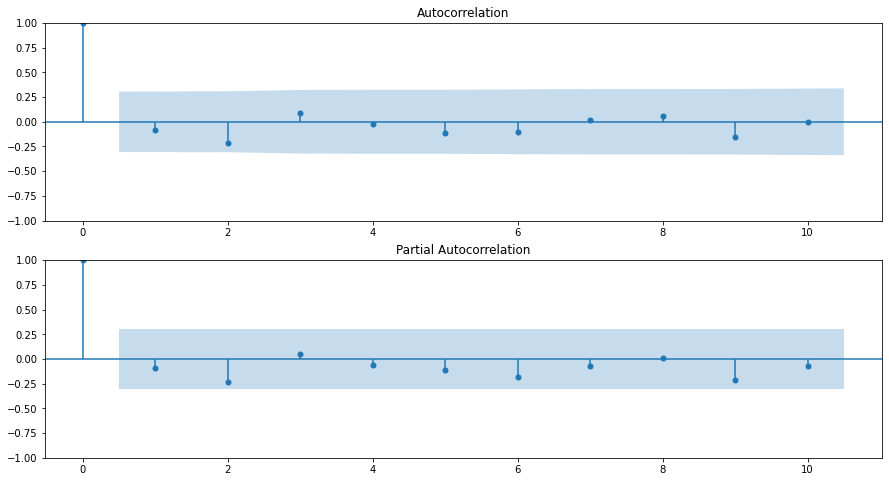

In [93]:
res = arima.resid
fig,ax = pyplot.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=10, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=10, ax=ax[1])
pyplot.show()

In [99]:
tr_start,tr_end = '2019-01-01','2019-12-31'
te_start,te_end = '2020-01-31','2022-12-31'
tra = factors['stock_1'][0:7].dropna()
tes = factors['stock_1'][7:].dropna()

In [95]:
#factors['stock_1']

In [100]:
pred = arima.predict(tr_end,te_end)[1:]

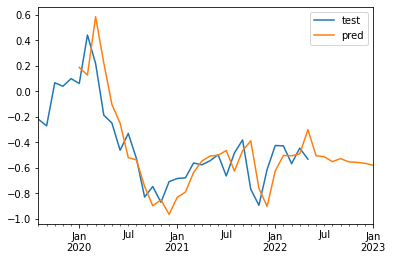

In [101]:

pd.DataFrame({'test':tes,'pred':pred}).plot();pyplot.show()


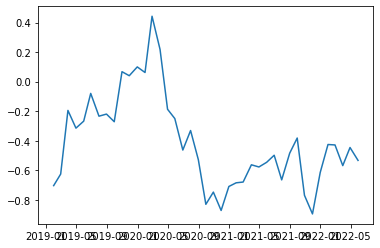

In [98]:
pyplot.plot(factors['stock_1'])

In [102]:
print('ARIMA model MSE:{}'.format(mean_squared_error(tes[0:29],pred[0:29])))


ARIMA model MSE:0.15253376675038183


In [ ]:
# end of MODEL

In [106]:

def print_results(output, test='adf'):    
    pval = output[1]
    test_score = output[0]
    lags = output[2]    
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'            
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Numbers of lags': lags,
    'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value
       
    return pd.Series(output_dict, name=test)

adf_output = tsa.adfuller(factors['stock_1'])
print_results(adf_output, 'adf')

Test Statistic               -2.065958
p-value                       0.258422
Numbers of lags                      0
decision                Non-Stationary
Critical Value (1%)          -3.605565
Critical Value (5%)          -2.937069
Critical Value (10%)         -2.606986
Name: adf, dtype: object